# AWS Magnetic (standard) Comparison

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Configs

In [2]:
# Rate Unit: $USD / GB-Month
GP2_RATE = 0.1
STD_RATE = 0.05

# IO Unit: $USD / IO
STD_IO = 0.05 / 1000000

# In GB
SIM_SIZE_RANGE = (1, 10240)

def gp2_baseline_iops(volume):
    max_iops = 10000
    iops_per_gb = 3.0
    return min(int(volume * iops_per_gb), max_iops)

## Cost Comparison / Fixed IOPS

In [3]:
cost_standard, cost_gp2 = [], []
volumes = range(*SIM_SIZE_RANGE)

for volume in volumes:
    cost_gp2.append(volume * GP2_RATE)
    cost_standard.append(volume * STD_RATE + gp2_baseline_iops(volume) * 3600 * 24 * 30 * STD_IO)

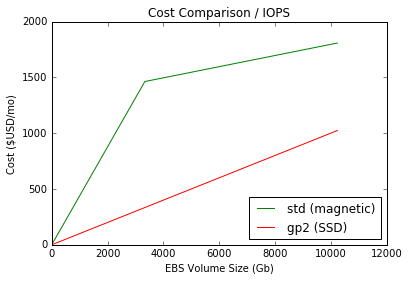

In [4]:
plt.title("Cost Comparison / IOPS")
plt.plot(volumes, cost_standard, 'g', label="std (magnetic)", hold=True)
plt.plot(volumes, cost_gp2, 'r', label="gp2 (SSD)")
plt.xlabel("EBS Volume Size (Gb)")
plt.ylabel("Cost ($USD/mo)")
plt.legend(loc=4)

## IOPS Comparison / Fixed Cost

In [5]:
iops_standard, iops_gp2 = [], []
volumes = range(*SIM_SIZE_RANGE)

for volume in volumes:
    iops = gp2_baseline_iops(volume)
    iops_gp2.append(iops)
    iops_standard.append(volume * (GP2_RATE - STD_RATE) / STD_IO / (3600 * 24 * 30))

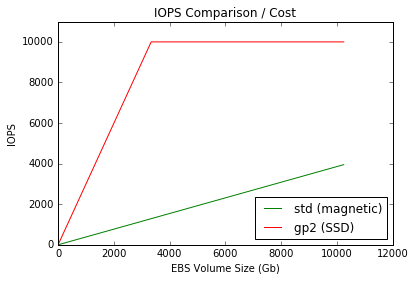

In [6]:
plt.title("IOPS Comparison / Cost")
plt.plot(volumes, iops_standard, 'g', label="std (magnetic)", hold=True)
plt.plot(volumes, iops_gp2, 'r', label="gp2 (SSD)")
plt.xlabel("EBS Volume Size (Gb)")
plt.ylabel("IOPS")
plt.axis(ymax=11000)
plt.legend(loc=4)